In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
kiva_loan = pd.read_csv('kiva_loans.csv')

In [36]:
pd.isnull(kiva_loan).any()

id                    False
funded_amount         False
loan_amount           False
activity              False
sector                False
use                    True
country_code           True
country               False
region                 True
currency              False
partner_id             True
posted_time           False
disbursed_time         True
funded_time            True
term_in_months        False
lender_count          False
tags                   True
borrower_genders       True
repayment_interval    False
date                  False
year                  False
month                 False
dahy                  False
dtype: bool

In [4]:
kiva_loan.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [7]:
def create_year(x):
    year = pd.DatetimeIndex(x).year 
    return year
    

In [21]:
def create_month(x):
    month = pd.DatetimeIndex(x).month_name() 
    return month
    

In [32]:
def create_day(x):
    day = pd.DatetimeIndex(x).day_name() 
    return day
    

In [33]:
del kiva_loan['day']

In [24]:
kiva_loan['month'] = create_month(kiva_loan['date'])

In [25]:
kiva_loan['dahy'] = create_day(kiva_loan['date'])

In [30]:
kiva_loan['day'] = kiva_loan['date'].apply(create_day)

In [20]:
create_month(kiva_loan['date'])

Index(['Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       ...
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Wednesday', 'Wednesday', 'Wednesday'],
      dtype='object', name='date', length=671205)

In [9]:
kiva_loan['year'] = create_year(kiva_loan['date'])

In [34]:
kiva_loan.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,year,month,dahy
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,2014,January,Wednesday
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,2014,January,Wednesday
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,2014,January,Wednesday
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,2014,January,Wednesday
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,2014,January,Wednesday


In [4]:
kiva_loan['sector'].value_counts()

Agriculture       180302
Food              136657
Retail            124494
Services           45140
Personal Use       36385
Housing            33731
Clothing           32742
Education          31013
Transportation     15518
Arts               12060
Health              9223
Construction        6268
Manufacturing       6208
Entertainment        830
Wholesale            634
Name: sector, dtype: int64

In [6]:
kiva_loan.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


The median amount of loan on Kiva is 450 dollars . The minimum loan amaount is 25 dollars  and the maximum loan amaount is 100000 dollars. We can also tell that on average each loan has 20 contributors. The average  number of months a loan is expected to be paid back is 13 and the maximum amount of time was 158 months while the minimum amount of time is one month.

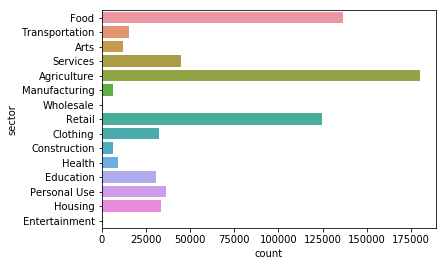

In [7]:
sns.countplot(data=kiva_loan, y='sector')

The majority of people who have gotten loans on Kiva are in Agriculture and food sectors which are very much related. The third sector is Retail. 

In [8]:
kiva_loan['country'].nunique()

87

This dataset has records from 87 different countiries.

In [9]:
kiva_loan['country'].unique()

array(['Pakistan', 'India', 'Kenya', 'Nicaragua', 'El Salvador',
       'Tanzania', 'Philippines', 'Peru', 'Senegal', 'Cambodia',
       'Liberia', 'Vietnam', 'Iraq', 'Honduras', 'Palestine', 'Mongolia',
       'United States', 'Mali', 'Colombia', 'Tajikistan', 'Guatemala',
       'Ecuador', 'Bolivia', 'Yemen', 'Ghana', 'Sierra Leone', 'Haiti',
       'Chile', 'Jordan', 'Uganda', 'Burundi', 'Burkina Faso',
       'Timor-Leste', 'Indonesia', 'Georgia', 'Ukraine', 'Kosovo',
       'Albania', 'The Democratic Republic of the Congo', 'Costa Rica',
       'Somalia', 'Zimbabwe', 'Cameroon', 'Turkey', 'Azerbaijan',
       'Dominican Republic', 'Brazil', 'Mexico', 'Kyrgyzstan', 'Armenia',
       'Paraguay', 'Lebanon', 'Samoa', 'Israel', 'Rwanda', 'Zambia',
       'Nepal', 'Congo', 'Mozambique', 'South Africa', 'Togo', 'Benin',
       'Belize', 'Suriname', 'Thailand', 'Nigeria', 'Mauritania',
       'Vanuatu', 'Panama', 'Virgin Islands',
       'Saint Vincent and the Grenadines',
       "Lao Peo

I am very curious to know which of these nations have the largest loan amount.

In [10]:
loan_amount_by_nation = kiva_loan.groupby('country')['funded_amount'].sum().reset_index()
loan_amount_by_nation.columns = ['Country','Total Amount']
loan_df = loan_amount_by_nation.sort_values(by='Total Amount',ascending=False)
loan_df.head(10)

,Country,Total Amount
59,Philippines,54476375.0
34,Kenya,32248405.0
58,Peru,30394850.0
57,Paraguay,29412700.0
22,El Salvador,23357725.0
80,United States,23158540.0
11,Cambodia,18817100.0
7,Bolivia,18276200.0
61,Rwanda,15505600.0
20,Ecuador,14598900.0


Philippines is leading woth the total number of loans at 54476375 dollars follolwed closely by the Republic of Kenya at 32248405, Peru and Paraguay. The figure below represents the top 10 borrowers. 

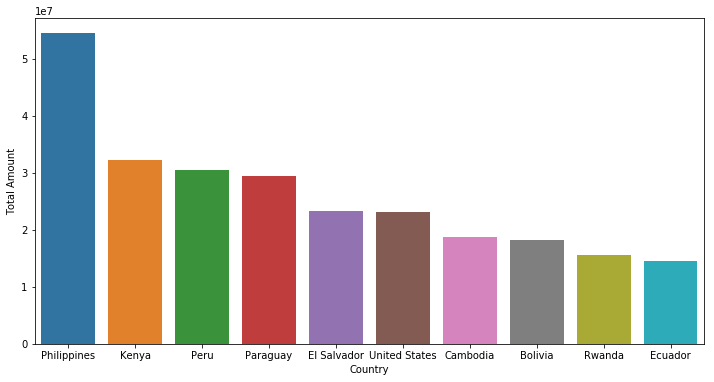

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(data=loan_df.head(10),x='Country',y='Total Amount')

I would also like to know the last 10 borrowers

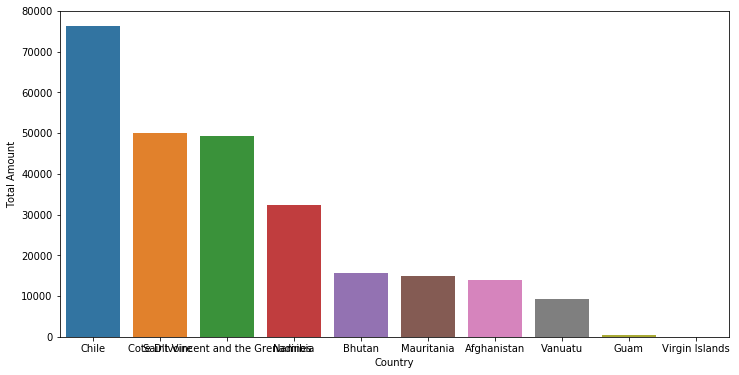

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(data=loan_df.tail(10),x='Country',y='Total Amount')

Which sector are most of the borrowers in from the top nation?

In [13]:
phil = kiva_loan[kiva_loan['country'] == 'Philippines']

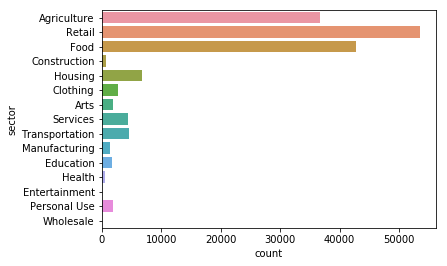

In [14]:
sns.countplot(data=phil,y='sector')

In Philippinesmost of the borrowers are in Retail, food and agriculture follow closely

In [15]:
ke = kiva_loan[kiva_loan['country'] == 'Kenya']

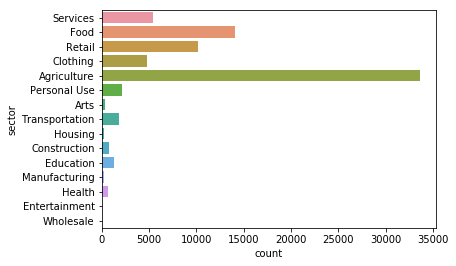

In [16]:
sns.countplot(data=ke,y='sector')

In Kenya most of the borrowers are in Agricture. It would probably be good idea for KIva to come up with products that are specifically targeted towards people who are in food and agriculture since they form majority of the borrowers. 

In [17]:
region_count = ke.groupby('region')['funded_amount'].sum().reset_index()
region_count.columns= ['Region','Total Amount Funded']
region_count.sort_values(by='Total Amount Funded',ascending=False).head(10)


,Region,Total Amount Funded
378,Webuye,1990025.0
281,Nairobi,1181000.0
354,Teso,1169275.0
156,Kitale,1157550.0
51,Eldoret,1046300.0
153,Kisii,1011675.0
218,Matete,975450.0
285,Nakuru,974300.0
155,Kisumu,854875.0
177,Likoni,811800.0


It is not surprising that Webuye is leading, owing to the fact that is known for subsistence farming in Kenya.

In [18]:
piv = ke.pivot_table(columns=['region','sector'],aggfunc='count')
piv

      region                  sector        
id    AHERO                   Transportation      2
      AWASI                   Food                1
                              Health              1
                              Services            1
      Aldina, Jomvu           Food                2
                              Retail              1
      Aldina,Jomvu            Clothing            1
                              Food                1
      Aldina,Jomvu Kenya      Retail              1
      Athi river              Agriculture         1
      Awendo                  Manufacturing       1
      Baba Dogo               Entertainment       1
                              Services            1
      Babadogo;Nairobi        Transportation      1
      Bakarani, Mombasa       Clothing            1
                              Food                2
                              Retail              1
                              Transportation      2
      Balozi, Nairo

I am curious to see the most used words in activity and use

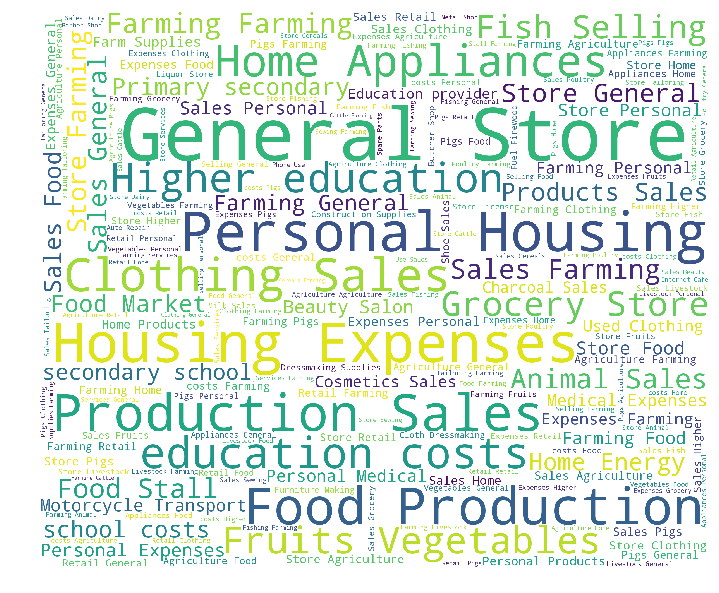

In [27]:
from wordcloud import WordCloud, STOPWORDS
corpus = ' '.join(kiva_loan['activity'])
corpus = corpus.replace('.', '. ')
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We ealrier noticed that agriculture was leading in the number of loans, it is not suprising that Agricultural related activities such as farming and production appear many times.

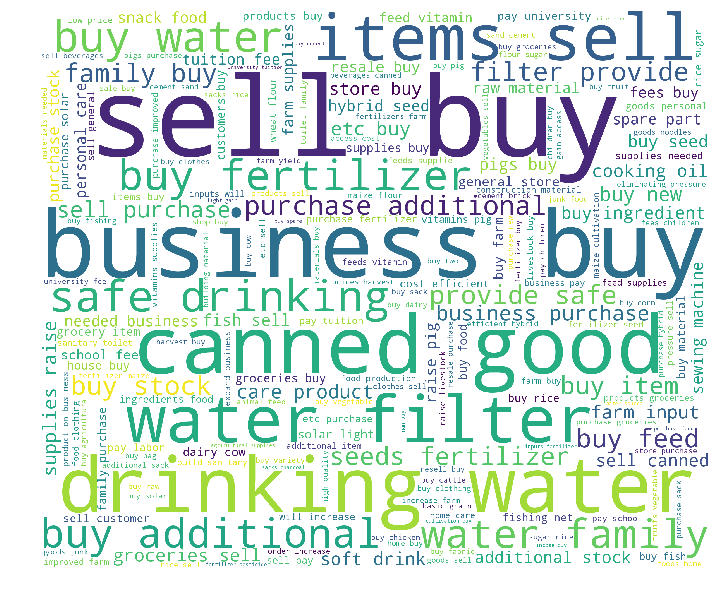

In [31]:
from wordcloud import WordCloud, STOPWORDS
corpus = ' '.join(kiva_loan['use'].astype(str))
corpus = corpus.replace('.', '. ')
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Most of the loans were used for business like activities like buying and selling. For example buying fertilizer, selling gloceries and purchasing additional stock

More on the way...